### MNIST Data Augmentation test

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import itertools
import h5py
from subprocess import check_output

import matplotlib as mpl
%matplotlib inline

In [10]:
#print(check_output(["ls", "../data"]).decode("utf8"))

In [11]:
with open \
  ('mnist_train_data.csv', 'r') as f:
        X_train = pd.read_csv(f, header=None)
with open \
  ('mnist_train_labels.csv', 'r') as f:
        y_train = pd.read_csv(f, header=None, names = ['labels'])
# with open \
#   ('mnist_test_data.csv', 'r') as f:
#         X_test = pd.read_csv(f, header=None)
# with open \
#   ('mnist_test_labels.csv', 'r') as f:
#         y_test = pd.read_csv(f, header=None)

In [12]:
print (X_train.shape, y_train.shape) 
combined_df =pd.concat([X_train, y_train], axis=1)
print (combined_df.shape)

(6000, 784) (6000, 1)
(6000, 785)


In [13]:
# to_keep = [4, 5]
# filterMesh = (combined_df['labels'].isin(to_keep))  ##  & (combined_df['count'] >= 50)
# df_final = combined_df.loc[filterMesh]
# df_labels = df_final['labels']
# df_X = df_final.drop(['labels'], axis = 1)

In [14]:
df_4 = combined_df[combined_df['labels'] == 4 ]
df_5 = combined_df[combined_df['labels'] == 5 ]
print ("Total 4 labels : {}, Total 5 labels : {}".format(len(df_4), len(df_5) ) )
df_4_5 = pd.concat([df_4, df_5])
df_4_5_labels =  df_4_5['labels']
df_4_5_X = df_4_5.drop(['labels'], axis = 1)

Total 4 labels : 623, Total 5 labels : 514


(1137, 784)

In [15]:
def img_flip(img):
    '''
    Performs a random flip on the tensor.
    If the tensor is C x H x W x D this will perform flips on two of the C, H, D dimensions
    If the tensor is C x H x W this will perform flip on either the H or the W dimension.
    `img` is the tensor
    '''
    shape = img.shape
    # This will flip along n-1 axes. (If we flipped all n axes then we'd get the same result every time)
    ax = np.random.choice(len(shape)-1,len(shape)-2, replace=False) + 1 # Choose randomly which axes to flip
    for i in ax:
        img = np.flip(img, i) # Randomly flip along all but one axis
    return img

In [16]:
def img_rotate(img):
    '''
    Perform a random rotation on the tensor
    `img` is the tensor
    '''
    shape = img.shape
    # This will flip along n-1 axes. (If we flipped all n axes then we'd get the same result every time)
    ax = np.random.choice(len(shape)-1,2, replace=False) # Choose randomly which axes to flip
    return np.flip(img.swapaxes(ax[0], ax[1]), ax[0]) # Random +90 or -90 rotation

In [17]:
tensor_lst = []

for i, row in df_4_5_X.iterrows():
    tmp = (row.as_matrix()).reshape(28,28,1)
    
    tmp_out = np.zeros(shape=(28,28,28,1))
    for x in range(28):
        tmp_out[x, :, : ,: ] = tmp
        
    tensor_lst.append( tmp_out.ravel()  )
tensor_3D = np.array (tensor_lst)
tensor_3D.shape

In [19]:
# ! ls ../../s3bucket/mnist/
# MNIST_PATH = '/Users/aluthra/Documents/DSE/s3bucket/mnist/'
# PATCH_DIM = 28
# NUM_SLICES = 28

In [20]:
# total_patch_dim = PATCH_DIM * PATCH_DIM * NUM_SLICES
# total_patch_dim

In [22]:
arr_labels = np.array(df_4_5_labels)
print (type(tensor_3D));
print (type(arr_labels));

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
with h5py.File('mnist_28x28x28' + '.hdf5', 'w') as HDF5:
    HDF5.create_dataset('input', data = tensor_3D )
    HDF5['input'].attrs['lshape'] = (28, 28, 28)   #(Height, Width, Depth)

    HDF5.create_dataset('output', data = arr_labels )

In [23]:
hdf5_file = h5py.File('mnist_28x28x28.hdf5', 'r') # open in read-only mode

In [24]:
for name in [key for key in hdf5_file.keys()]:
    print(name);
    print(hdf5_file[name]); #name + shape + dtype of the dataset (refer back to extract_patch.py)
    print(hdf5_file[name][0:2]); #get the first 2 rows of the datasetaa

input
<HDF5 dataset "input": shape (1137, 21952), type "<f8">
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
output
<HDF5 dataset "output": shape (1137,), type "<i8">
[4 4]


In [25]:
labels = np.array(df_4_5_labels)

5


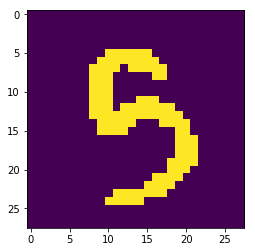

In [26]:
idx =900
print (labels[idx])
im = tensor_3D[idx].reshape(28,28,28,1)
plt.imshow(im[14, :, : ,0]);
#plt.imshow(img_flip(im)[14, :, : ,0]);
#plt.imshow(img_rotate(im)[14, :, : ,0]);

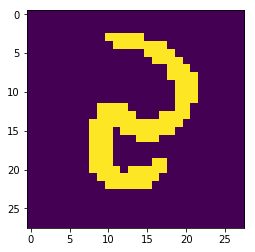

In [27]:
plt.imshow(img_flip(im)[14, :, : ,0]);

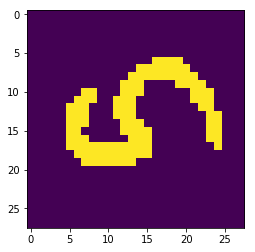

In [28]:
plt.imshow(img_rotate(im)[14, :, : ,0]);

In [29]:
# toFilter = [4, 5]
# filterMesh = (combined_df['labels'].isin(toFilter))  ##  & (combined_df['count'] >= 50)
# df_final = combined_df.loc[filterMesh]

In [31]:
df_4_5_labels.shape

(1137,)